In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [87]:
df = pd.read_csv('C:/Users/mehta/OneDrive/Documents/Stevens_2/BIA_678/Fraud_1.csv')

In [88]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


## Visualization

In [68]:
rand = df.sample(n=100000)

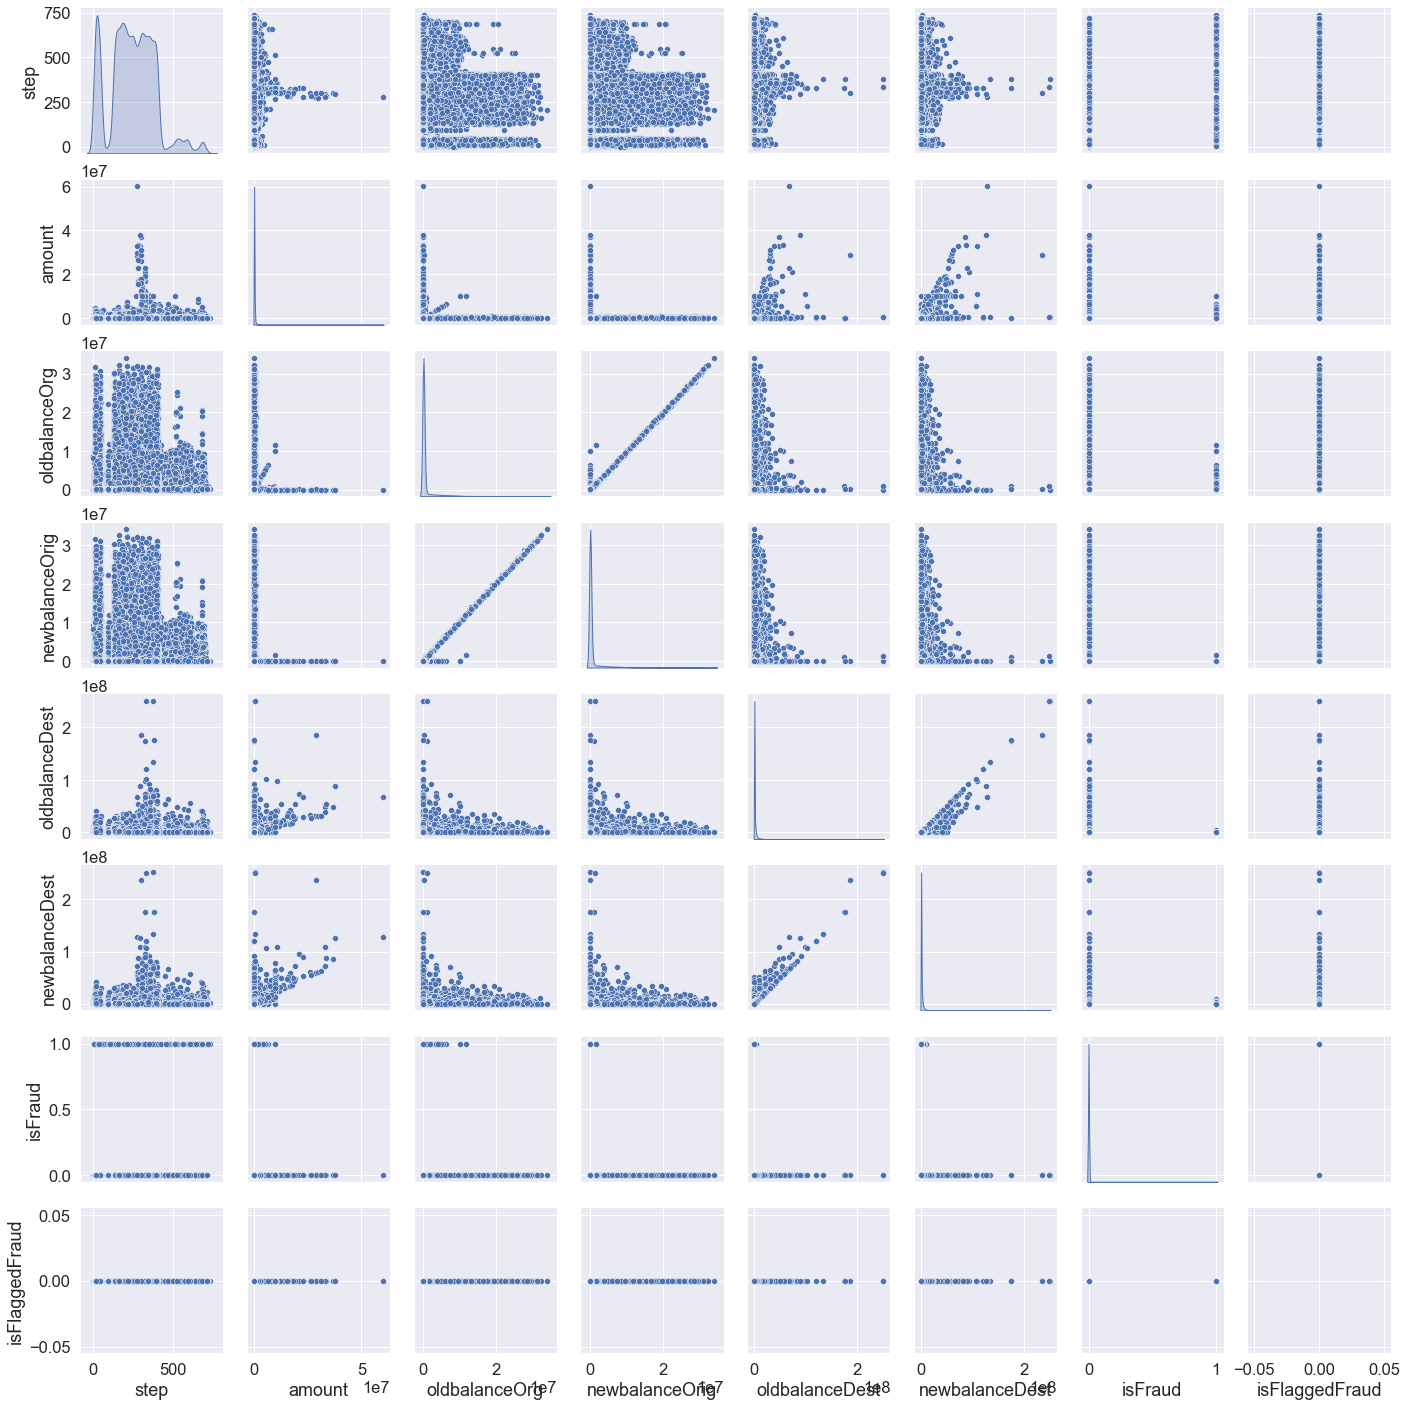

In [69]:
sns.set(font_scale = 1.5)
pair_plot = sns.pairplot(rand,diag_kind='kde')
pair_plot.savefig("out.png") 

In [70]:
print(df['isFraud'].value_counts())

0    6354407
1       8213
Name: isFraud, dtype: int64


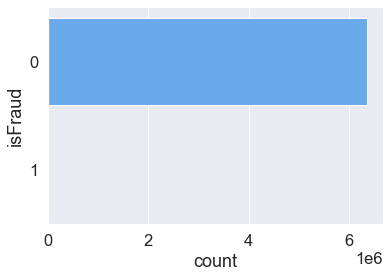

In [78]:
sns.countplot(y = df['isFraud'], palette='cool');

<AxesSubplot:>

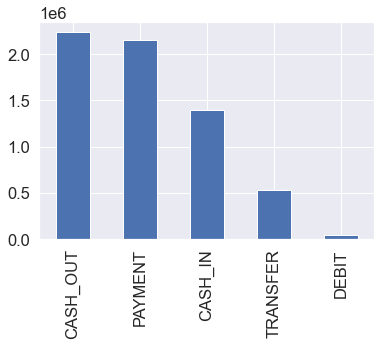

In [71]:
df['type'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='step', ylabel='Count'>

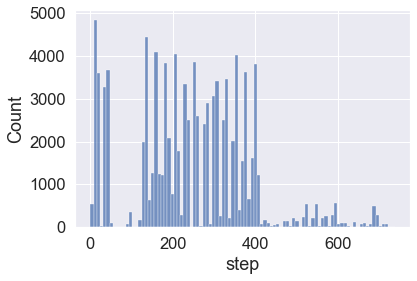

In [82]:
sns.histplot(rand['step'])

(0.0, 2000000.0)

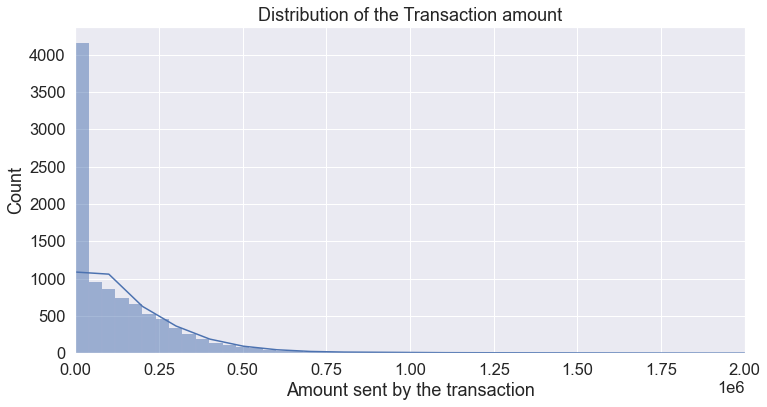

In [89]:
binse1 = np.arange(0, max(df.amount)+4e4, 4e4)
plt.figure(figsize=(12,6))
sns.histplot(data = df.sample(10000), x='amount', bins=binse1, kde=True)
plt.title('Distribution of the Transaction amount')
plt.xlabel('Amount sent by the transaction')
plt.xlim(0,2e6)

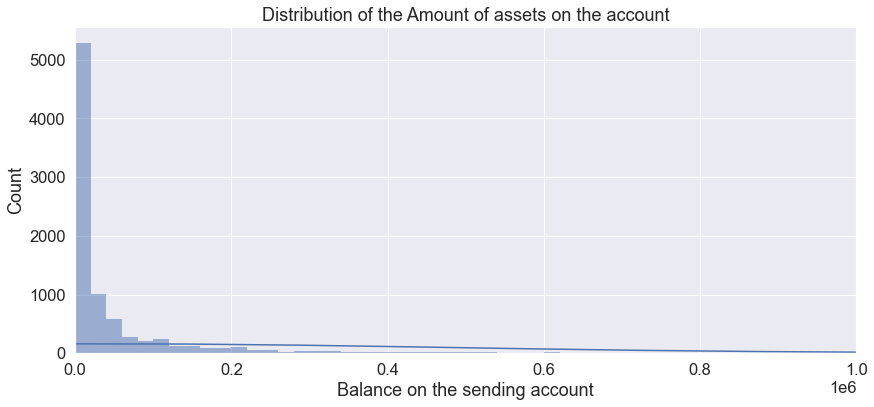

In [74]:
binse2 = np.arange(0, max(df.amount)+2e4, 2e4)
plt.figure(figsize=(14,6))
sns.histplot(data = df.sample(10000), x='oldbalanceOrg', bins=binse2, kde=True)
plt.title('Distribution of the Amount of assets on the account')
plt.xlabel('Balance on the sending account')
plt.xlim(0,1e6);

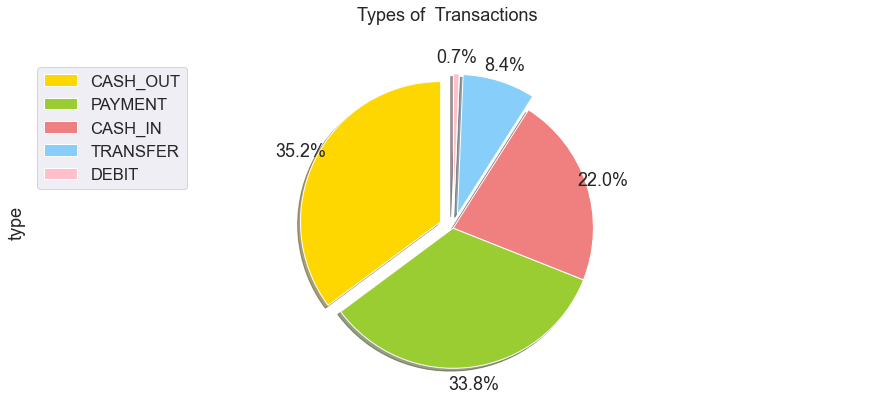

In [56]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink']
explode_list = [0.1, 0, 0, 0.1, 0.1]
df['type'].value_counts().plot(kind='pie',
                                    figsize=(15, 6),
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    shadow=True,
                                    labels=None,
                                    pctdistance=1.12,
                                    colors=color_list,
                                    explode=explode_list
                                    )

plt.title('Types of  Transactions', loc='center', y=1.1)
plt.axis('equal')
plt.legend(labels=df["type"].value_counts().index , loc='upper left')

plt.show()

In [0]:
import pyspark.sql.functions as F
import numpy as np
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import mean, sum, max, col,count
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import when
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col
from pyspark.sql.functions import lit
from pyspark.sql.functions import col,sum
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

from pyspark.ml.classification import RandomForestClassifier , DecisionTreeClassifier, LogisticRegression
from pyspark.ml.tuning import CrossValidator,  TrainValidationSplit, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import PCA
from sklearn.ensemble import AdaBoostClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
import matplotlib as plt
import seaborn as sns

## 1 Import data

In [0]:
data_file = '/FileStore/tables/Fraud.csv'
data= spark.read.csv(data_file,header = True)

## 2 Data exploration

In [0]:
data.count()
data.dtypes

Out[3]: [('step', 'string'),
 ('type', 'string'),
 ('amount', 'string'),
 ('nameOrig', 'string'),
 ('oldbalanceOrg', 'string'),
 ('newbalanceOrig', 'string'),
 ('nameDest', 'string'),
 ('oldbalanceDest', 'string'),
 ('newbalanceDest', 'string'),
 ('isFraud', 'string'),
 ('isFlaggedFraud', 'string')]

In [0]:
data.limit(3).toPandas()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0


In [0]:
data.groupBy('isFraud').count().show()

+-------+-------+
|isFraud|  count|
+-------+-------+
|      0|6354407|
|      1|   8213|
+-------+-------+



In [0]:
data.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in data.columns)).show()

+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|step|type|amount|nameOrig|oldbalanceOrg|newbalanceOrig|nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|   0|   0|     0|       0|            0|             0|       0|             0|             0|      0|             0|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+



### Here we are understanding which attributes belongs to fraudulent

In [0]:
subd = data.filter(data['isFraud'] == 1).groupby('type').count().show()

+--------+-----+
|    type|count|
+--------+-----+
|TRANSFER| 4097|
|CASH_OUT| 4116|
+--------+-----+



**Our Observation**: Based on only two attributes TRANSFER or CASH_OUT tranction type will be fraud.

In [0]:
data.groupby('isFlaggedFraud').count().show()

+--------------+-------+
|isFlaggedFraud|  count|
+--------------+-------+
|             0|6362604|
|             1|     16|
+--------------+-------+



### 2.2 Here we will check if this is consistent with the decription of the column that more than 200,200 will be conisdered as illegeal or fraud dectection

In [0]:
data.filter(data['isFlaggedFraud'] == 1).orderBy('amount').show()

+----+--------+----------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|    amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+----------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
| 425|TRANSFER|     1.0E7| C689608084|1.958504037E7| 1.958504037E7|C1392803603|           0.0|           0.0|      1|             1|
| 730|TRANSFER|     1.0E7|C2140038573|1.731625505E7| 1.731625505E7|C1395467927|           0.0|           0.0|      1|             1|
| 646|TRANSFER|     1.0E7|  C19004745|1.039904508E7| 1.039904508E7|C1806199534|           0.0|           0.0|      1|             1|
| 250|TRANSFER|1343002.08|C1100582606|   1343002.08|    1343002.08|C1147517658|           0.0|           0.0|      1|             1|
| 617|TRANSFER|2542664.27| C786455622|   2542664.27|    2542664.27| C

### Check the min and max of the values when it's flagged as fraud

In [0]:
max_1 = data.filter(data['isFlaggedFraud'] == 1).agg({"amount": "max"}).collect()[0]
min_1 = data.filter(data['isFlaggedFraud'] == 1).agg({"amount": "min"}).collect()[0]

In [0]:
max_1 = data.filter(data['isFlaggedFraud'] == 1).agg({"amount": "mean"}).collect()[0]

In [0]:
data.groupBy(['isFlaggedFraud']).agg({'amount':'avg','isFlaggedFraud':'count'}).show()

+--------------+------------------+---------------------+
|isFlaggedFraud|       avg(amount)|count(isFlaggedFraud)|
+--------------+------------------+---------------------+
|             0|179850.13041768412|              6362604|
|             1| 4861597.730624999|                   16|
+--------------+------------------+---------------------+



In [0]:
groupBy = ["isFlaggedFraud"]
aggregate = ["amount"] 
funs = [mean, sum, max,count]
exprs = [f(col(c)) for f in funs for c in aggregate]

In [0]:
re1 = data.groupby(*groupBy).agg(*exprs).collect()
re1

Out[13]: [Row(isFlaggedFraud='0', avg(amount)=179850.13041768412, sum(amount)=1144315159196.0786, max(amount)='99999.81', count(amount)=6362604),
 Row(isFlaggedFraud='1', avg(amount)=4861597.730624999, sum(amount)=77785563.68999998, max(amount)='9585040.37', count(amount)=16)]

In [0]:
max_0 = data.filter(data['isFlaggedFraud'] == 0).agg({"amount": "max"}).collect()[0]
min_0 = data.filter(data['isFlaggedFraud'] == 0).agg({"amount": "min"}).collect()[0]

In [0]:
max_1[0],min_1[0],max_0[0],min_0[0]

Out[15]: (4861597.730624999, '1.0E7', '99999.81', '0.0')

**Observations**: Here we can say once is flagged as fraud, the destination's account are always zero before and after transcation. It 
    made sense as the transcation will be halted when it's flagged as fraud.

In [0]:
data.filter( (data['isFlaggedFraud'] == 0) & (data['oldbalanceDest'] ==0) & (data['newbalanceDest'] ==0)).show(5)

+----+--------+--------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|  amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+--------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT| 9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PAYMENT| 1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
|   1|TRANSFER|   181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1| PAYMENT|11668.14|C2048537720|      41554.0|      29885.86|M1230701703|           0.0|           0.0|      0|             0|
|   1| PAYMENT| 7817.71|  C90045638|      53860.0|      46042.29| M573487274|      

In [0]:
### whether the account names is duplicated or not when it is flagged as fraud
data.filter(data['isFlaggedFraud'] == 1).groupBy('nameOrig').count().show()

+-----------+-----+
|   nameOrig|count|
+-----------+-----+
| C728984460|    1|
|C1035541766|    1|
|C1100582606|    1|
| C908544136|    1|
|C2140038573|    1|
|C1684585475|    1|
| C452586515|    1|
| C917414431|    1|
| C724693370|    1|
| C992223106|    1|
|C1869569059|    1|
|  C19004745|    1|
| C689608084|    1|
| C193696150|    1|
| C786455622|    1|
|C1892216157|    1|
+-----------+-----+



In [0]:
data.filter(data['isFlaggedFraud'] == 1).groupBy('nameDest').count().show()

+-----------+-----+
|   nameDest|count|
+-----------+-----+
| C639921569|    1|
|C1147517658|    1|
|C1100697970|    1|
| C891140444|    1|
|C1806199534|    1|
|C1861208726|    1|
|C1395467927|    1|
| C661958277|    1|
|C1392803603|    1|
| C484597480|    1|
|C1909486199|    1|
|C1082139865|    1|
|C1770418982|    1|
|C1308068787|    1|
|C1109166882|    1|
|C1366804249|    1|
+-----------+-----+



### 2.3. Are expected merchant accounts accordingly labelled?
It was stated <a href='http://www2.bth.se/com/edl.nsf/pages/phd-dissertation'>[5]</a> that CASH_IN involves being paid by
a merchant (whose name is prefixed by 'M'). However, as shown below, the present data does not have
merchants making CASH_IN transactions to customers.

In [0]:
subd1 = data.filter( (data['type'] == 'CASH_IN') & \
                (data['nameOrig'].like('%M%')) ).show(4)

+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|step|type|amount|nameOrig|oldbalanceOrg|newbalanceOrig|nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+



In [0]:
subd1 = data.filter( (data['type'] == 'CASH_OUT') & \
                (data['nameOrig'].like('%M%')) ).show(4)

+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|step|type|amount|nameOrig|oldbalanceOrg|newbalanceOrig|nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+



In [0]:
data.filter(data['nameDest'].like('%M%')).groupBy('type').count().show()

+-------+-------+
|   type|  count|
+-------+-------+
|PAYMENT|2151495|
+-------+-------+



In [0]:
data.filter( (col('nameDest').isin(col('nameOrig'))) & (data['isFraud'] == 1)).show(5)

+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|step|type|amount|nameOrig|oldbalanceOrg|newbalanceOrig|nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+



### Fraud transcation or not Fraud transaction

In [0]:
df1 = data.filter(data['isFraud'] == 1) ## fraud
df0 = data.filter(data['isFraud'] == 0) ## not fraud

In [0]:
unique_org_names1 = [i.nameOrig for i in df1.select('nameOrig').distinct().collect()]
unique_org_names0 = [i.nameOrig for i in df0.select('nameOrig').distinct().collect()]

Could destination accounts for fraudulent TRANSFERs originate CASHOUTs that
are not detected and are labeled as genuine? It turns out there are  3 such
accounts.

## 3 Data cleaning

In [0]:
x0 = data.filter(data['type'].isin(['CASH_OUT','TRANSFER']))

In [0]:
data.select(['type']).distinct().show()

+--------+
|    type|
+--------+
|TRANSFER|
| CASH_IN|
|CASH_OUT|
| PAYMENT|
|   DEBIT|
+--------+



##### Destination account - replace zero with -1

In [0]:
x0 = x0.withColumn('oldbalanceDest', \
              when((x0['oldbalanceDest'] == 0) & (x0['newbalanceDest'] ==0) & (x0['amount'] !=0), -1).otherwise(x0['oldbalanceDest']))

x0 = x0.withColumn('newbalanceDest', \
              when((x0['oldbalanceDest'] == 0) & (x0['newbalanceDest'] ==0) & (x0['amount'] !=0), -1).otherwise(x0['newbalanceDest']))

In [0]:
x0.agg({"oldbalanceDest": "min"}).collect()[0]

Out[27]: Row(min(oldbalanceDest)='-1')

#### Convert string/catogorical data to numeric columns

In [0]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(x0) for column in ['type'] ]
pipeline = Pipeline(stages=indexers)
x_r = pipeline.fit(x0).transform(x0)

In [0]:
x_r.limit(5).toPandas()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_index
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,-1,0.0,1,0,1.0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,0.0
2,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,0.0
3,1,TRANSFER,215310.3,C1670993182,705.0,0.0,C1100439041,22425.0,0.0,0,0,1.0
4,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1.0


In [0]:
x_x= x_r.withColumn('type_index',x_r['type_index'].cast(IntegerType()))
x_x = x_x.withColumn('isFraud',x_r['isFraud'].cast(IntegerType()))

In [0]:
x_x = x_x.withColumnRenamed('isFraud','label')

In [0]:
x_x.limit(5).toPandas()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,label,isFlaggedFraud,type_index
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,-1,0.0,1,0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,0
2,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,0
3,1,TRANSFER,215310.3,C1670993182,705.0,0.0,C1100439041,22425.0,0.0,0,0,1
4,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1


In [0]:
new_df = x_x.drop('type')

In [0]:
new_df.limit(5).toPandas()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,label,isFlaggedFraud,type_index
0,1,181.0,C1305486145,181.0,0.0,C553264065,-1,0.0,1,0,1
1,1,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,0
2,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,0
3,1,215310.3,C1670993182,705.0,0.0,C1100439041,22425.0,0.0,0,0,1
4,1,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1


## 4 Feature enginering

In [0]:
new_df = new_df.withColumn("errorbalanceOrig", col("newbalanceOrig") + col("amount") - col("oldbalanceOrg"))
new_df = new_df.withColumn("errorbalanceDest", col("oldbalanceDest") + col("amount") - col("newbalanceDest"))

In [0]:
new_df.limit(5).toPandas()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,label,isFlaggedFraud,type_index,errorbalanceOrig,errorbalanceDest
0,1,181.0,C1305486145,181.0,0.0,C553264065,-1,0.0,1,0,1,0.00,180.0
1,1,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,0,0.00,21363.0
2,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,0,213808.94,182703.5
3,1,215310.3,C1670993182,705.0,0.0,C1100439041,22425.0,0.0,0,0,1,214605.30,237735.3
4,1,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1,300850.89,-2401220.0


## converting data types for few columns of data frame

In [0]:
y_variable = ['isFraud']
x_variable = ['step','type_index','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest',
              'newbalanceDest',"errorbalanceOrig","errorbalanceDest"]

In [0]:
new_df.dtypes

Out[38]: [('step', 'string'),
 ('amount', 'string'),
 ('nameOrig', 'string'),
 ('oldbalanceOrg', 'string'),
 ('newbalanceOrig', 'string'),
 ('nameDest', 'string'),
 ('oldbalanceDest', 'string'),
 ('newbalanceDest', 'string'),
 ('label', 'int'),
 ('isFlaggedFraud', 'string'),
 ('type_index', 'int'),
 ('errorbalanceOrig', 'double'),
 ('errorbalanceDest', 'double')]

In [0]:
x_var_1 = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
for col_name in x_var_1:
    new_df = new_df.withColumn(col_name, col(col_name).cast('float'))

In [0]:
new_df.dtypes

Out[40]: [('step', 'float'),
 ('amount', 'float'),
 ('nameOrig', 'string'),
 ('oldbalanceOrg', 'float'),
 ('newbalanceOrig', 'float'),
 ('nameDest', 'string'),
 ('oldbalanceDest', 'float'),
 ('newbalanceDest', 'float'),
 ('label', 'int'),
 ('isFlaggedFraud', 'string'),
 ('type_index', 'int'),
 ('errorbalanceOrig', 'double'),
 ('errorbalanceDest', 'double')]

## 6 Model - pipeline

In [0]:
data25 = new_df.sample(fraction=0.25)
data50 = new_df.sample(fraction=0.50)

## 100% data

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import pandas as pd

vector_col = "features"
assembler = VectorAssembler(inputCols = ['step','type_index','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest',
              'newbalanceDest','errorbalanceOrig','errorbalanceDest'], outputCol='features')
output_data = assembler.transform(new_df)
matrix = Correlation.corr(output_data, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [0]:
print(corrmatrix)

[[1.0, 0.016021604331451767, 0.037007459805667504, 0.0057442025163807, -0.011279814399286974, 0.0377781650335032, 0.037475240273688426, 0.03393609030888289, 0.02901036951679666], [0.016021604331451767, 1.0, 0.3260400003117209, 0.01320199820957993, -0.018725849058049342, 0.0997936602180667, 0.1570242643296228, 0.32365715978309734, -0.03919737093844829], [0.037007459805667504, 0.3260400003117209, 1.0, 0.12038862006467152, 0.018295522157837987, 0.3071334321436601, 0.4970267238796567, 0.9828375204238857, -0.23419778122060725], [0.0057442025163807, 0.01320199820957993, 0.12038862006467152, 1.0, 0.7788262413126014, -0.020403493888953527, -0.010029035597195448, -0.030438307340930025, 0.11385310805023238], [-0.011279814399286974, -0.018725849058049342, 0.018295522157837987, 0.7788262413126014, 1.0, -0.012276908645607687, -0.015439476768832651, -0.03226260992549951, 0.061630033683891014], [0.0377781650335032, 0.0997936602180667, 0.3071334321436601, -0.020403493888953527, -0.012276908645607687, 

In [0]:
numeric_variables = ['step','type_index','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest',
              'newbalanceDest','errorbalanceOrig','errorbalanceDest']

In [0]:
corr_matrix_df = pd.DataFrame(data=corrmatrix, columns = numeric_variables, index=numeric_variables)

Out[51]: <AxesSubplot:>

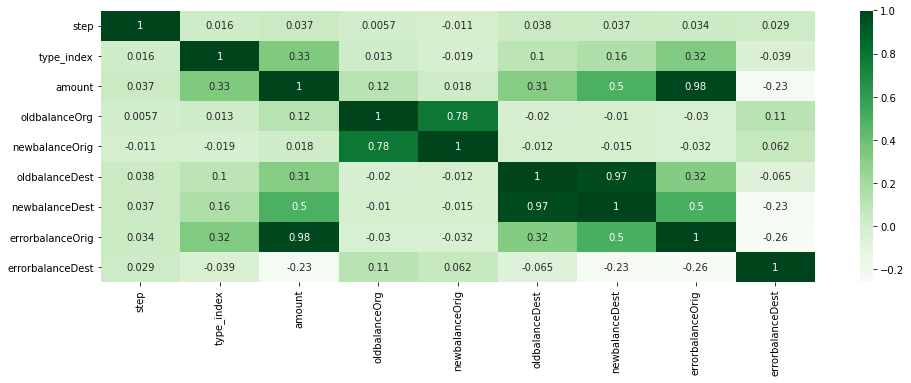

In [0]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))  
sns.heatmap(corr_matrix_df, 
            xticklabels=corr_matrix_df.columns.values,
            yticklabels=corr_matrix_df.columns.values,  cmap="Greens", annot=True)

In [0]:
new_df_pandas = new_df.toPandas()
sns.pairplot(new_df_pandas,diag_kind='kde')

Out[46]: <seaborn.axisgrid.PairGrid at 0x7f016d5986a0>

In [0]:
output_data.printSchema()

root
 |-- step: float (nullable = true)
 |-- amount: float (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: float (nullable = true)
 |-- newbalanceOrig: float (nullable = true)
 |-- nameDest: string (nullable = true)
 |-- oldbalanceDest: float (nullable = true)
 |-- newbalanceDest: float (nullable = true)
 |-- label: integer (nullable = true)
 |-- isFlaggedFraud: string (nullable = true)
 |-- type_index: integer (nullable = true)
 |-- errorbalanceOrig: double (nullable = true)
 |-- errorbalanceDest: double (nullable = true)
 |-- features: vector (nullable = true)



In [0]:
display(new_df['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','label'].describe().show())

+-------+------------------+------------------+------------------+-----------------+-----------------+--------------------+
|summary|            amount|     oldbalanceOrg|    newbalanceOrig|   oldbalanceDest|   newbalanceDest|               label|
+-------+------------------+------------------+------------------+-----------------+-----------------+--------------------+
|  count|           2770409|           2770409|           2770409|          2770409|          2770409|             2770409|
|   mean|317536.14088750724| 47643.07941258225|16091.904684507483|1703551.159911361|2049734.436878726|0.002964544224336551|
| stddev| 887789.6579753241|251325.12754967486|151255.82528366853|4225550.489815048|4676990.060623072|0.054366871979002085|
|    min|               0.0|               0.0|               0.0|             -1.0|              0.0|                   0|
|    max|        9.244552E7|        5.958504E7|        4.958504E7|     3.56015904E8|     3.56179264E8|                   1|
+-------

In [0]:
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

final_data = output_data.select('features','label')

## 100% data

In [0]:
import time
from pyspark.ml.evaluation import BinaryClassificationEvaluator
final_data.printSchema()
#split the dataset ; build the model
train, test = final_data.randomSplit([0.7, 0.3])
models = LogisticRegression(labelCol= 'label')
start = time.time()
model = models.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
predictions_train = model.transform(test)
evaluator.evaluate(predictions_train)

lrtime_100 = stop-start
y_true = predictions_train.select(['label']).collect()
y_pred = predictions_train.select(['prediction']).collect()
print(classification_report(y_true, y_pred))
print('Accuracy for Logistic Regression Model : ', metrics.accuracy_score(y_true, y_pred))
print("Time taken to run logistic Regression Model on 100% data:" , lrtime_100)
print('Test Area Under Roc for Logistic Regression 100%',evaluator.evaluate(predictions_train))

root
 |-- features: vector (nullable = true)
 |-- label: integer (nullable = true)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    829154
           1       0.89      0.50      0.64      2539

    accuracy                           1.00    831693
   macro avg       0.95      0.75      0.82    831693
weighted avg       1.00      1.00      1.00    831693

Accuracy for Logistic Regression Model :  0.9982938415978011
Time taken to run logistic Regression Model on 100% data: 120.50304436683655
Test Area Under Roc for Logistic Regression 100% 0.9803173946111599


In [0]:
###DecisionTreee Classifier

In [0]:
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
start = time.time()
model_dt = dt.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
predictions_dt = model_dt.transform(test)
dttime_100 = stop-start

y_true_dt = predictions_dt.select(['label']).collect()
y_pred_dt = predictions_dt.select(['prediction']).collect()
print(classification_report(y_true_dt, y_pred_dt))
print('Accuracy for Decesion Tree Classifier Model : ', metrics.accuracy_score(y_true_dt, y_pred_dt))
print("Time taken to run Decision Tree model on 100% data:" , dttime_100)
print('Test Area Under Roc for DecisionTreeClassifier 100%',evaluator.evaluate(predictions_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    829154
           1       0.99      1.00      0.99      2539

    accuracy                           1.00    831693
   macro avg       0.99      1.00      1.00    831693
weighted avg       1.00      1.00      1.00    831693

Accuracy for Decesion Tree Classifier Model :  0.9999470958634977
Time taken to run Decision Tree model on 100% data: 205.28539037704468
Test Area Under Roc for DecisionTreeClassifier 100% 0.99499730599909


In [0]:
#Random Forest Classifier

In [0]:
rf = RandomForestClassifier(labelCol="label",featuresCol="features", numTrees=10)
start = time.time()
model_rf = rf.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
predictions_rf = model_rf.transform(test)
rftime_100 = stop-start
y_true_rf = predictions_rf.select(['label']).collect()
y_pred_rf = predictions_rf.select(['prediction']).collect()
print(classification_report(y_true_rf, y_pred_rf))
print('Accuracy for Random Forest Classifier Model : ', metrics.accuracy_score(y_true_rf, y_pred_rf))
print("Time taken to Random forest Model on 100% data:" , rftime_100)
print('Test Area Under Roc for DecisionTreeClassifier 100%',evaluator.evaluate(predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    829154
           1       1.00      0.97      0.98      2539

    accuracy                           1.00    831693
   macro avg       1.00      0.99      0.99    831693
weighted avg       1.00      1.00      1.00    831693

Accuracy for Random Forest Classifier Model :  0.9999086201278596
Time taken to Random forest Model on 100% data: 219.3192102909088
Test Area Under Roc for DecisionTreeClassifier 100% 0.9986195536662085


In [0]:
##GBT Classifier

In [0]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="label", featuresCol="features")
start = time.time()
model_gbt = gbt.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
# test our model and make predictions using testing data
predictions_gbt = model_gbt.transform(test)
gbttime_100 = stop-start
y_true_gbt = predictions_gbt.select(['label']).collect()
y_pred_gbt = predictions_gbt.select(['prediction']).collect()
print(classification_report(y_true_gbt, y_pred_gbt))
print('Accuracy for Boosting Model : ', metrics.accuracy_score(y_true_gbt, y_pred_gbt))
print("Time taken to GBT Classifier on 100% data:" , gbttime_100)
print('Test Area Under Roc for GBT Classifier 100%',evaluator.evaluate(predictions_gbt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    829154
           1       0.99      1.00      0.99      2539

    accuracy                           1.00    831693
   macro avg       0.99      1.00      1.00    831693
weighted avg       1.00      1.00      1.00    831693

Accuracy for Boosting Model :  0.9999482982302363
Time taken to GBT Classifier on 100% data: 362.03516817092896
Test Area Under Roc for GBT Classifier 100% 0.9990877738810789


## 25% data

In [0]:
output_data_25 = assembler.transform(data25)
final_data_25 = output_data_25.select('features','label')

In [0]:
###Logistic Regression

In [0]:
import time
train, test = final_data_25.randomSplit([0.7, 0.3])
models = LogisticRegression(labelCol= 'label')
start = time.time()
model = models.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
predictions_train = model.transform(test)
lrtime_25 = stop-start
y_true = predictions_train.select(['label']).collect()
y_pred = predictions_train.select(['prediction']).collect()

print(classification_report(y_true, y_pred))
print('Accuracy for Logistic Regression Model : ', metrics.accuracy_score(y_true, y_pred))
print("Time taken to run for Logistic Regression 25 % data :" , lrtime_25)
print('Test Area Under Roc for GBT Classifier 25%%',evaluator.evaluate(predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    207098
           1       0.92      0.51      0.65       639

    accuracy                           1.00    207737
   macro avg       0.96      0.75      0.83    207737
weighted avg       1.00      1.00      1.00    207737

Accuracy for Logistic Regression Model :  0.9983440600374512
Time taken to run for Logistic Regression 25 % data : 80.18127918243408
Test Area Under Roc for GBT Classifier 25%% 0.9827103242088508


In [0]:
##Decision Tree Classifier

In [0]:
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features",impurity='gini')
start = time.time()
model_dt = dt.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
predictions_dt = model_dt.transform(test)

dttime_25 = stop-start
y_true_dt = predictions_dt.select(['label']).collect()
y_pred_dt = predictions_dt.select(['prediction']).collect()
print(classification_report(y_true_dt, y_pred_dt))
print('Accuracy for Decesion Tree Classifier Model : ', metrics.accuracy_score(y_true_dt, y_pred_dt))
print("Time taken to run Decesion Tree Classifier 25 % data :" , dttime_25)
print('Test Area Under Roc for Decesion Tree Classifier 25% data',evaluator.evaluate(predictions_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    207098
           1       0.98      0.96      0.97       639

    accuracy                           1.00    207737
   macro avg       0.99      0.98      0.98    207737
weighted avg       1.00      1.00      1.00    207737

Accuracy for Decesion Tree Classifier Model :  0.9997930075046814
Time taken to run Decesion Tree Classifier 25 % data : 136.77713894844055
Test Area Under Roc for Decesion Tree Classifier 25% data 0.9928261303672264


In [0]:
###randomForest Classifier

In [0]:
rf = RandomForestClassifier(labelCol="label",featuresCol="features", numTrees=10)
start = time.time()
model_rf = rf.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
predictions_rf = model_rf.transform(test)
rftime_25 = stop-start

y_true_rf = predictions_rf.select(['label']).collect()
y_pred_rf = predictions_rf.select(['prediction']).collect()
print(classification_report(y_true_rf, y_pred_rf))
print('Accuracy for Random Forest Classifier Model : ', metrics.accuracy_score(y_true_rf, y_pred_rf))
print("Time taken to run Random Forest Classifier :" , rftime_25)
print('Test Area Under Roc for Random Forest Classifier 25% data',evaluator.evaluate(predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    207098
           1       0.99      0.87      0.93       639

    accuracy                           1.00    207737
   macro avg       1.00      0.93      0.96    207737
weighted avg       1.00      1.00      1.00    207737

Accuracy for Random Forest Classifier Model :  0.999576387451441
Time taken to run Random Forest Classifier : 150.1723871231079
Test Area Under Roc for Random Forest Classifier 25% data 0.9969172359351589


In [0]:
gbt = GBTClassifier(labelCol="label", featuresCol="features")
start = time.time()
model_gbt = gbt.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
# test our model and make predictions using testing data
predictions_gbt = model_gbt.transform(test)
gbttime_25 = stop-start

y_true_gbt = predictions_gbt.select(['label']).collect()
y_pred_gbt = predictions_gbt.select(['prediction']).collect()
print(classification_report(y_true_gbt, y_pred_gbt))
print('Accuracy for Boosting Model : ', metrics.accuracy_score(y_true_gbt, y_pred_gbt))
print("Time taken to Boosting Model :" , gbttime_25)
print('Test Area Under Roc for Boosting Model 25% data',evaluator.evaluate(predictions_gbt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    207098
           1       0.97      0.99      0.98       639

    accuracy                           1.00    207737
   macro avg       0.99      1.00      0.99    207737
weighted avg       1.00      1.00      1.00    207737

Accuracy for Boosting Model :  0.9998892830838993
Time taken to Boosting Model : 189.13586688041687
Test Area Under Roc for Boosting Model 25% data 0.9974570679087448


## 50% data

In [0]:
output_data_50 = assembler.transform(data50)
final_data_50 = output_data_50.select('features','label')
train, test = final_data_50.randomSplit([0.7, 0.3])

In [0]:
##Logistic Regression

In [0]:
models = LogisticRegression(labelCol= 'label')
start = time.time()
model = models.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
predictions_train = model.transform(test)
lrtime_50 = stop-start
y_true = predictions_train.select(['label']).collect()
y_pred = predictions_train.select(['prediction']).collect()

print(classification_report(y_true, y_pred))
print('Accuracy for Logistic Regression Model : ', metrics.accuracy_score(y_true, y_pred))
print("Time taken to run Logistic Regression 50 % data :" , lrtime_50)
print('Test Area Under Roc for Logistic Regression 50% data',evaluator.evaluate(predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    414231
           1       0.87      0.50      0.64      1229

    accuracy                           1.00    415460
   macro avg       0.94      0.75      0.82    415460
weighted avg       1.00      1.00      1.00    415460

Accuracy for Logistic Regression Model :  0.9983078996774659
Time taken to run Logistic Regression 50 % data : 96.41475367546082
Test Area Under Roc for Logistic Regression 50% data 0.9760734243128244


In [0]:
###Decesion Tree classifier

In [0]:
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
start = time.time()
model_dt = dt.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
predictions_dt = model_dt.transform(test)
dttime_50 = stop-start
y_true_dt = predictions_dt.select(['label']).collect()
y_pred_dt = predictions_dt.select(['prediction']).collect()
print(classification_report(y_true_dt, y_pred_dt))
print('Accuracy for Decision Tree Classifier Model : ', metrics.accuracy_score(y_true_dt, y_pred_dt))
print("Time taken to run Decision tree Classifier for 50 % data:" , dttime_50)
print('Test Area Under Roc for Decision Tree Classifier 50% data',evaluator.evaluate(predictions_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    414231
           1       0.99      1.00      0.99      1229

    accuracy                           1.00    415460
   macro avg       1.00      1.00      1.00    415460
weighted avg       1.00      1.00      1.00    415460

Accuracy for Decision Tree Classifier Model :  0.9999687093823714
Time taken to run Decision tree Classifier for 50 % data: 156.8105010986328
Test Area Under Roc for Decision Tree Classifier 50% data 0.9934035560190912


In [0]:
### Random Forest Classifier

In [0]:
rf = RandomForestClassifier(labelCol="label",featuresCol="features", numTrees=10)
start = time.time()
model_rf = rf.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
predictions_rf = model_rf.transform(test)
rftime_50 = stop-start

y_true_rf = predictions_rf.select(['label']).collect()
y_pred_rf = predictions_rf.select(['prediction']).collect()
print(classification_report(y_true_rf, y_pred_rf))
print('Accuracy for Random Forest Classifier Model : ', metrics.accuracy_score(y_true_rf, y_pred_rf))
print("Time taken to run Random Forest Classifier for 50 % data:" , rftime_50)
print('Test Area Under Roc for Random Forest Classifier Classifier 50% data',evaluator.evaluate(predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    414231
           1       1.00      0.77      0.87      1229

    accuracy                           1.00    415460
   macro avg       1.00      0.88      0.93    415460
weighted avg       1.00      1.00      1.00    415460

Accuracy for Random Forest Classifier Model :  0.9993140133827565
Time taken to run Random Forest Classifier for 50 % data: 166.13120007514954
Test Area Under Roc for Random Forest Classifier Classifier 50% data 0.9992444929652788


In [0]:
### GBT

In [0]:
gbt = GBTClassifier(labelCol="label", featuresCol="features")
start = time.time()
model_gbt = gbt.fit(train)
stop = time.time()
evaluator = BinaryClassificationEvaluator()
# test our model and make predictions using testing data
predictions_gbt = model_gbt.transform(test)
gbttime_50 = stop-start

y_true_gbt = predictions_gbt.select(['label']).collect()
y_pred_gbt = predictions_gbt.select(['prediction']).collect()
print(classification_report(y_true_gbt, y_pred_gbt))
print('Accuracy for Boosting Model : ', metrics.accuracy_score(y_true_gbt, y_pred_gbt))
print("Time taken to Boosting Model 50 % data :" , gbttime_50)
print('Test Area Under Roc for Boosting Model 50% data',evaluator.evaluate(predictions_gbt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    414231
           1       0.99      1.00      1.00      1229

    accuracy                           1.00    415460
   macro avg       1.00      1.00      1.00    415460
weighted avg       1.00      1.00      1.00    415460

Accuracy for Boosting Model :  0.9999735233235449
Time taken to Boosting Model 50 % data : 234.2488031387329
Test Area Under Roc for Boosting Model 50% data 0.9996848621425898


In [0]:
d = {'% of data': [0.25,0.5,1,0.25,0.5,1,0.25,0.5,1,0.25,0.5,1],
     'Training time':[lrtime_25,lrtime_50,lrtime_100,
                      gbttime_25,gbttime_50,gbttime_100,
                      rftime_25,rftime_50,rftime_100,
                      dttime_25,dttime_50,dttime_100],
     'Model':['Logistic regression','Logistic regression','Logistic regression',
              'Boosting classifier','Boosting classifier','Boosting classifier',
              'Random forest classifier','Random forest classifier','Random forest classifier',
              'Decision tree classifier','Decision tree classifier','Decision tree classifier',]
              }
time_df = pd.DataFrame(data=d)
time_df

,% of data,Training time,Model
0,0.25,80.181279,Logistic regression
1,0.50,96.414754,Logistic regression
2,1.00,120.503044,Logistic regression
3,0.25,189.135867,Boosting classifier
4,0.50,234.248803,Boosting classifier
5,1.00,362.035168,Boosting classifier
6,0.25,150.172387,Random forest classifier
7,0.50,166.131200,Random forest classifier
8,1.00,219.319210,Random forest classifier
9,0.25,136.777139,Decision tree classifier


Out[90]: <AxesSubplot:xlabel='Training time', ylabel='% of data'>

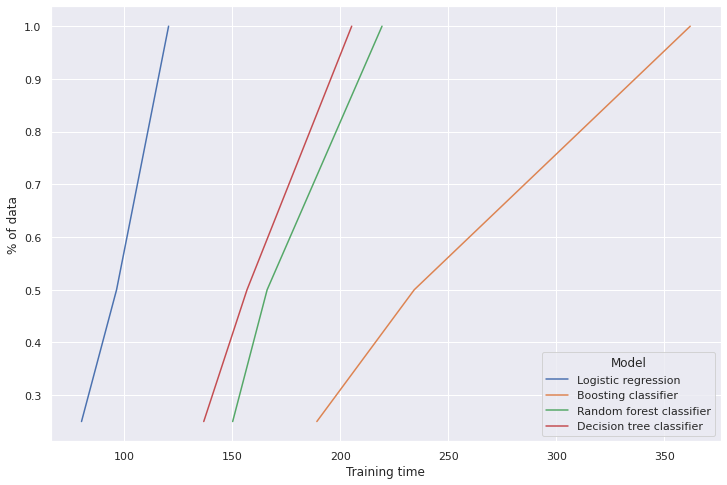

In [0]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Training time", y="% of data",
             hue="Model",
             data=time_df)